<h3>Introduction to Text Analysis - Getting into Natural Language Processing</h3>

<h4>1. Case Study I: Developing Term Frequencies, WordClouds and TF-Inverse Document Frequencies</h4><br/>
 Text Analysis is a fundamental skill in natural language processing that aims to denoising, textual data, get an information summary of what a given text is about. In this case study, you will be exposed to text data preprocessing, and the generation of a term frequency bar graph and wordcloud. datasets: <span style="color: blue;">speech.txt"</span>

<b style="color:blue;">Step I: using file handling, load a text file into a Python and print it out. </b>

"
file_r = open('../datasets/speech.txt',encoding='utf-8')<br/>
text = file_r.read().lower()<br/>
file_r.close()<br/>
print(text)<br/>
"

In [48]:
file_r = open('../datasets/speech.txt',encoding='utf-8')
text = file_r.read().lower()
file_r.close()

<b style="color:blue;">Step II: using regular expressions, remove all characters that are not numbers, or letters or spaces.<br/>
    
"
 import re<br/>
 regex_exp = r""<br/>
 clean_text = re.sub(regex_exp,'',text)<br/>
"

In [49]:
import re
regex_exp = r"[^a-zA-z0-9\s]"
clean_text = re.sub(regex_exp,'',text)
print(clean_text)


gettysburg address

delivered at gettysburg pa

nov 19th 1863

four score and seven years ago our fathers brought forth on this continent a new nation conceived in liberty and dedicated to the proposition that all men are created equal now we are engaged in a great civil war testing whether that nation or any nation so conceived and so dedicated can long endure we are met on a great battlefield of that war we have come to dedicate a portion of that field as a final resting place for those who here gave their lives that that nation might live it is altogether fitting and proper that we should do this but in a larger sense we cannot dedicate we cannot consecrate we cannot hallow this ground the brave men living and dead who struggled here have consecrated it far above our poor power to add or detract the world will little note nor long remember what we say here but it can never forget what they did here it is for us the living rather to be dedicated here to the unfinished work which the

<b style="color:blue;">Step III: Using the tokeniser of your choice, convert the text file into a list of tokens and list all unique token to form the bag of words<br/>

In [50]:
from textblob import TextBlob
text_blob = TextBlob(clean_text)
word_list = text_blob.words
bag_of_words = list(set(word_list))
print(bag_of_words)

['it', 'above', 'remember', 'proper', 'government', 'little', 'our', 'proposition', 'detract', 'far', 'address', 'are', 'from', 'thus', 'testing', 'nor', 'created', 'can', 'continent', 'might', 'they', 'gettysburg', 'died', 'portion', 'honored', 'nov', 'liberty', 'to', 'live', 'struggled', 'unfinished', 'seven', 'those', 'usthat', 'dead', 'all', 'is', 'that', 'brave', 'battlefield', 'consecrated', 'four', 'which', 'by', 'say', 'devotion', 'will', 'their', 'in', 'civil', 'fought', 'war', 'be', 'before', 'god', 'world', 'now', 'here', 'forth', 'conceived', 'any', 'ground', 'poor', 'a', 'resting', 'great', 'shall', 'delivered', 'place', 'final', 'for', 'larger', 'not', 'rather', 'add', 'these', 'this', 'last', 'vain', 'dedicated', 'at', 'pa', 'or', 'sense', 'lives', 'so', 'do', 'highly', 'brought', 'resolve', 'perish', 'birth', 'gave', 'forget', 'ago', 'score', 'should', 'did', 'take', 'who', 'nation', 'what', 'hallow', 'but', 'people', 'engaged', 'never', 'freedom', 'increased', 'altoget

<b style="color:blue;">Step IV: Remove all stop words form the bag of words, generate a term frequency dataframe<br/>

In [58]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopword_list = stopwords.words('english')

clean_bag_of_words = [word for word in bag_of_words if word not in stopword_list]

In [59]:
import pandas as pd

N_w = len(clean_bag_of_words)
tf_df = pd.DataFrame({'term':clean_bag_of_words, 'freq':[0]*N_w})

for i in range(N_w):
    for j in range(len(word_list)):
        if word_list[j] == tf_df.iloc[i,0]:
            tf_df.iloc[i,1]+=1
tf_df.head()

,term,freq
0,remember,1
1,proper,1
2,government,1
3,little,1
4,proposition,1


<b style="color:blue;">Step V: Sort descendingly the term frequency data by frequency and generate a bar plot for the top 30 terms<br/>

Text(0.5, 1.0, 'Term Frequency - Top 20 terms')

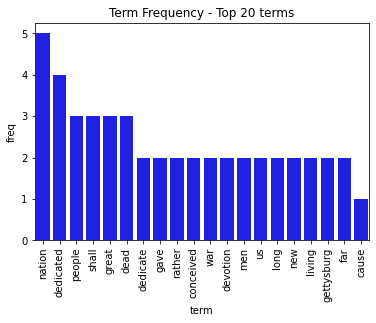

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

sorted_tf_df = tf_df.sort_values(by='freq',ascending=False)
sorted_tf_df.index = [i for i in range(N_w)]

TopN = 20
top_tf_df = sorted_tf_df.iloc[0:TopN,:]
ax = sns.barplot(x='term',y='freq',data=top_tf_df,color='blue')
ax.tick_params(axis='x', rotation=90)
plt.title('Term Frequency - Top %s terms'%(TopN))

<b style="color:blue;">Step VI: Generate a Wordcloud from your preprocessed text<br/>

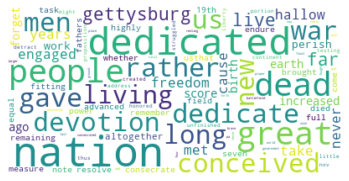

In [71]:
from wordcloud import WordCloud

N_ws = len(sorted_tf_df)
text_ = ''
for i in range(N_ws):
    term = sorted_tf_df.iloc[i,0]
    freq = sorted_tf_df.iloc[i,1]
    for j in range(freq):
        text_+=term+' '

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text_)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<b style="color:blue;">Step VII: Generate a term frequency inverse document frequency dataframe</b><br/><br/>
You are given a corpus (i.e. collection of documents) to work from.

The 

In [74]:
docfreq_df = pd.DataFrame({'term':tf_df.term, 'freq':[0]*len(tf_df)})



,term,freq
0,remember,0
1,proper,0
2,government,0
3,little,0
4,proposition,0
